# Parcial 1
## Marlijar Hurtado Moreno y Oleg Jarma Montoya

In [ ]:
import pandas as pd
from pandas import Series
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

Cargamos los datos

In [ ]:
data=pd.ExcelFile("Series Parcial 1.xlsx")
df=data.parse("Energía", header=1)
df=df.drop("Unnamed: 2", axis=1)
display(df)
print(df.dtypes)

,Período,ENE
0,2000-01-01,79.346091
1,2000-02-01,77.678283
2,2000-03-01,82.763817
3,2000-04-01,78.349011
4,2000-05-01,82.953554
...,...,...
210,2017-07-01,134.625487
211,2017-08-01,137.280345
212,2017-09-01,133.608195
213,2017-10-01,136.390707


Período    datetime64[ns]
ENE               float64
dtype: object


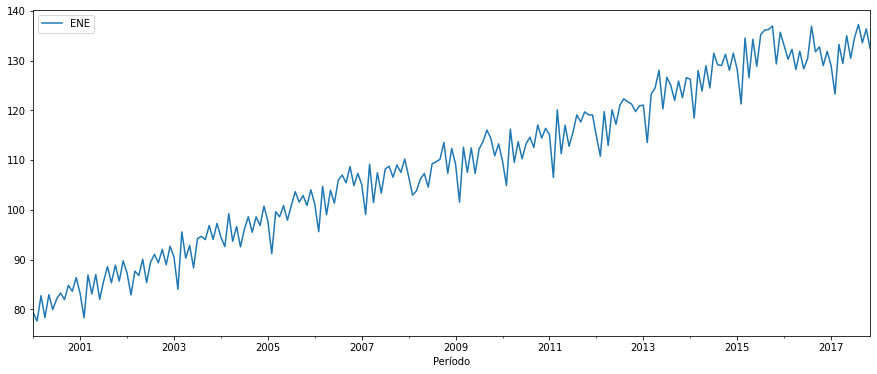

In [ ]:
df.set_index('Período', inplace=True)
df.index = pd.to_datetime(df.index)
df.plot()

En el gráfica de la serie Energía podemos observar que la serie no es estacionaria puesto que tiene un componente estacionario anual, tiene tendencia que crece a lo largo de la serie,  no tiene media constante a lo largo del tiempo y tampoco la varianza marginal es constante en el periodo observado.  La estructura de correlación presente en los datos es bastante alto puesto que se observa un correlación entre  cada rezago. 

In [ ]:
energia.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', name='Período', length=215, freq='MS')

In [ ]:
energia.index.freq="MS"
energia.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', name='Período', length=215, freq='MS')

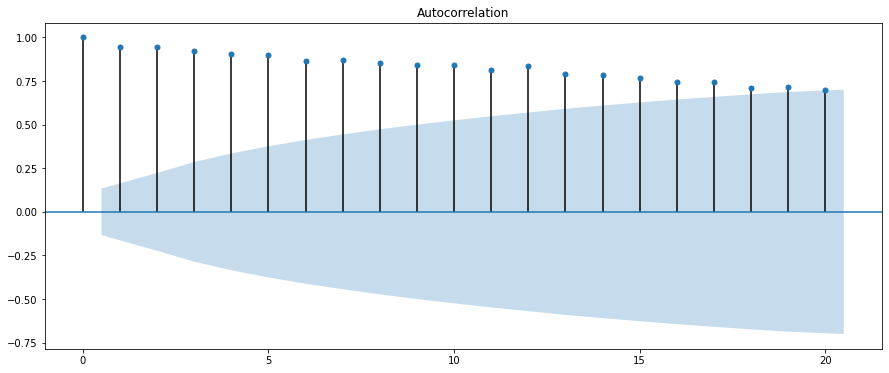

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(st, lags=20)
plt.show()

In [ ]:
print(st.dtypes)

float64


Período
2000-01-01     89.919487
2000-02-01     87.933651
2000-03-01     93.994108
2000-04-01     88.732075
2000-05-01     94.220513
                 ...    
2017-07-01    156.530657
2017-08-01    159.761953
2017-09-01    155.293159
2017-10-01    158.678871
2017-11-01    153.817642
Name: logEner, Length: 215, dtype: float64

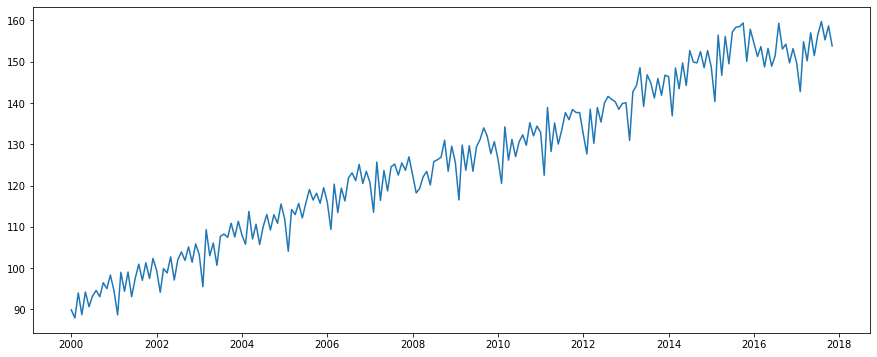

In [ ]:
from scipy import stats

stats.boxcox(st,alpha=0.05)
stats.boxcox(df['ENE'],alpha=0.05)
logEner=stats.boxcox(df['ENE'],lmbda=1.04)
df = df.assign(logEner=logEner)   

logEnergia=df
logENE=logEnergia["logEner"]
plt.plot(logENE)
display(logENE)

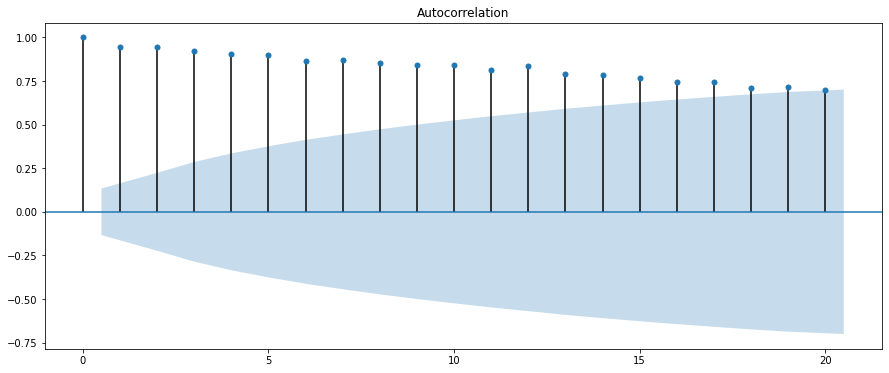

In [ ]:
plot_acf(logENE, lags=20)
plt.show()

In [ ]:
logENE.index.freq="MS"
logENE.index

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01'],
              dtype='datetime64[ns]', name='Período', length=215, freq='MS')

Text(0, 0.5, 'resid')

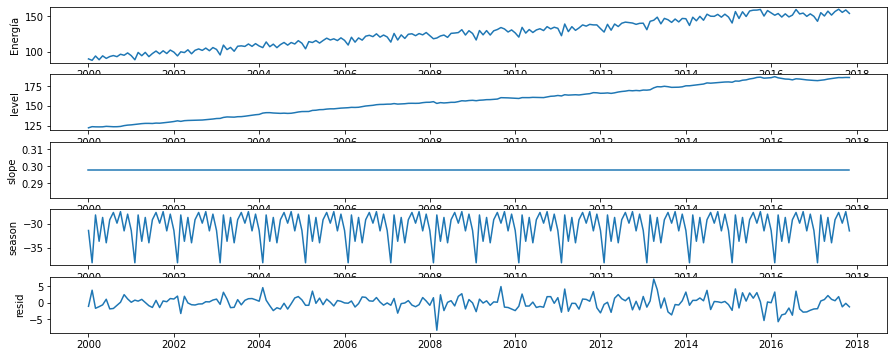

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

exponencial = ExponentialSmoothing(logENE, seasonal_periods=12, trend='add', seasonal='add').fit(use_boxcox=False)

plt.subplot(5, 1, 1)
plt.plot(logENE)
plt.ylabel('Energía') 
plt.subplot(5, 1, 2)
plt.plot(exponencial.level)
plt.ylabel('level') 
plt.subplot(5, 1, 3)
plt.plot(exponencial.slope)
plt.ylabel('slope') 
plt.subplot(5, 1, 4)
plt.plot(exponencial.season)
plt.ylabel('season') 
plt.subplot(5, 1, 5)
plt.plot(exponencial.resid)
plt.ylabel('resid') 

In [ ]:
indice=df.index
shiftdf=pd.DataFrame(df["logEner"].values, index=indice)

In [ ]:

df1=pd.DataFrame()
print(df1)

Empty DataFrame
Columns: []
Index: []


In [ ]:
for i in range(20,0,-1):
    df1[['t-'+str(i)]] = shiftdf.shift(i)
df1["t"]=shiftdf.values

In [ ]:
display(df1)

,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.919487
2000-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.919487,87.933651
2000-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.919487,87.933651,93.994108
2000-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.919487,87.933651,93.994108,88.732075
2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.919487,87.933651,93.994108,88.732075,94.220513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-07-01,150.107621,157.861873,154.554586,151.265392,153.677324,148.737994,153.228399,148.926232,151.427717,159.330577,153.089379,154.275014,149.719340,153.189914,149.736272,142.745419,154.867040,150.212995,157.010627,151.494794,156.530657
2017-08-01,157.861873,154.554586,151.265392,153.677324,148.737994,153.228399,148.926232,151.427717,159.330577,153.089379,154.275014,149.719340,153.189914,149.736272,142.745419,154.867040,150.212995,157.010627,151.494794,156.530657,159.761953
2017-09-01,154.554586,151.265392,153.677324,148.737994,153.228399,148.926232,151.427717,159.330577,153.089379,154.275014,149.719340,153.189914,149.736272,142.745419,154.867040,150.212995,157.010627,151.494794,156.530657,159.761953,155.293159
2017-10-01,151.265392,153.677324,148.737994,153.228399,148.926232,151.427717,159.330577,153.089379,154.275014,149.719340,153.189914,149.736272,142.745419,154.867040,150.212995,157.010627,151.494794,156.530657,159.761953,155.293159,158.678871


In [ ]:
df1_final=df1[20:]
display(df1_final.head(20))

,t-20,t-19,t-18,t-17,t-16,t-15,t-14,t-13,t-12,t-11,t-10,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
2001-09-01,89.919487,87.933651,93.994108,88.732075,94.220513,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825
2001-10-01,87.933651,93.994108,88.732075,94.220513,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814
2001-11-01,93.994108,88.732075,94.220513,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290
2001-12-01,88.732075,94.220513,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796
2002-01-01,94.220513,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437
2002-02-01,90.666560,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437,94.166809
2002-03-01,93.233954,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437,94.166809,99.893779
2002-04-01,94.611824,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437,94.166809,99.893779,98.830801
2002-05-01,93.078132,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437,94.166809,99.893779,98.830801,102.732360
2002-06-01,96.474388,95.052931,98.321968,94.514114,88.694583,98.985870,94.411096,99.074037,93.101863,97.452335,100.961776,97.062825,101.318814,97.498290,102.357796,99.445437,94.166809,99.893779,98.830801,102.732360,97.129383


In [ ]:
df1_split=df1_final.values

X1=df1_split[:, 0:-1]
y1=df1_split[:,-1]

**REDES NEURONALES** 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
X_train_full, X_test, y_train_full, y_test=train_test_split(X1,y1,test_size=0.1, train_size=0.9)
X_train, X_val, y_train, y_val=train_test_split(X_train_full,y_train_full,test_size=0.2, train_size=0.8)

In [ ]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [ ]:
import tensorflow as tf

In [ ]:
model=tf.keras.models.Sequential([
                                  tf.keras.layers.Input(shape=X_train.shape[1:]),
                                  tf.keras.layers.Dense(32, activation="tanh"),
                                  tf.keras.layers.Dense(32, activation="linear"),
                                  tf.keras.layers.Dense(32, activation="linear"),
                                  tf.keras.layers.Dense(1, activation="linear")                 
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="mean_squared_error",optimizer="sgd")

In [ ]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Epoch 1/100
5/5 [==============================] - 0s 21ms/step - loss: nan - val_loss: nan
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: nan - val_loss: nan
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: nan - val_loss: nan
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: nan
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: nan - val_loss: 

**ÁRBOLES DE DECISIÓN**

In [ ]:
Y1 = y1
traintarget_size = int(len(Y1) * 0.9302)  
train_target, test_target = Y1[0:traintarget_size], Y1[traintarget_size:len(Y1)]

In [ ]:
print('Observations for Target: %d' % (len(Y1)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Testing Observations for Target: %d' % (len(test_target)))

Observations for Target: 195
Training Observations for Target: 181
Testing Observations for Target: 14


In [ ]:
trainfeature_size = int(len(X1) * 0.9302)
train_feature, test_feature = X1[0:trainfeature_size], X1[trainfeature_size:len(X1)]   
print('Observations for feature: %d' % (len(X1)))
print('Training Observations for feature: %d' % (len(train_feature)))
print('Testing Observations for feature: %d' % (len(test_feature)))

Observations for feature: 195
Training Observations for feature: 181
Testing Observations for feature: 14


In [ ]:
from sklearn.tree import DecisionTreeRegressor

arbol = DecisionTreeRegressor()  
arbol.fit(train_feature, train_target)

print(arbol.score(train_feature, train_target))
print(arbol.score(test_feature,test_target))



1.0
-0.17569464361766385


In [ ]:


arbol2 = DecisionTreeRegressor(max_depth=2)  
arbol2.fit(train_feature, train_target)
print ("2")
print(arbol2.score(train_feature, train_target))
print(arbol2.score(test_feature,test_target))


arbol3 = DecisionTreeRegressor(max_depth=3)  
arbol3.fit(train_feature, train_target)
print ("3")
print(arbol3.score(train_feature, train_target))
print(arbol3.score(test_feature,test_target))

arbol4 = DecisionTreeRegressor(max_depth=4)  
arbol4.fit(train_feature, train_target)
print ("4")
print(arbol4.score(train_feature, train_target))
print(arbol4.score(test_feature,test_target))



arbol5 = DecisionTreeRegressor(max_depth=5)  
arbol5.fit(train_feature, train_target)
print ("5")
print(arbol5.score(train_feature, train_target))
print(arbol5.score(test_feature,test_target))


arbol7 = DecisionTreeRegressor(max_depth=7)  
arbol7.fit(train_feature, train_target)
print ("7")
print(arbol7.score(train_feature, train_target))
print(arbol7.score(test_feature,test_target))


arbol8 = DecisionTreeRegressor(max_depth=8)  
arbol8.fit(train_feature, train_target)
print ("8")
print(arbol8.score(train_feature, train_target))
print(arbol8.score(test_feature,test_target))


arbol10 = DecisionTreeRegressor(max_depth=10)  
arbol10.fit(train_feature, train_target)
print ("10")
print(arbol10.score(train_feature, train_target))
print(arbol10.score(test_feature,test_target))




2
0.9193533104421671
-0.41565374305717895
3
0.969575006670296
-0.053557276952372
4
0.9847095475221123
-0.22913248803433153
5
0.992560950883082
-0.035067155977726694
7
0.9990790503165625
-0.15117630939875948
8
0.9998561361385112
-0.08124434218824028
10
0.9999991028441826
0.11483877719154434


Escogemos la profundidad 10 ya que es la única en donde el conjunto de validación nos da positivo


|--- feature_8 <= 125.76
|   |--- feature_8 <= 108.75
|   |   |--- feature_8 <= 99.67
|   |   |   |--- feature_8 <= 95.29
|   |   |   |   |--- value: [97.09]
|   |   |   |--- feature_8 >  95.29
|   |   |   |   |--- value: [102.21]
|   |   |--- feature_8 >  99.67
|   |   |   |--- feature_8 <= 104.01
|   |   |   |   |--- value: [106.85]
|   |   |   |--- feature_8 >  104.01
|   |   |   |   |--- value: [110.55]
|   |--- feature_8 >  108.75
|   |   |--- feature_8 <= 118.89
|   |   |   |--- feature_8 <= 113.98
|   |   |   |   |--- value: [115.70]
|   |   |   |--- feature_8 >  113.98
|   |   |   |   |--- value: [120.52]
|   |   |--- feature_8 >  118.89
|   |   |   |--- feature_18 <= 125.19
|   |   |   |   |--- value: [124.05]
|   |   |   |--- feature_18 >  125.19
|   |   |   |   |--- value: [126.79]
|--- feature_8 >  125.76
|   |--- feature_8 <= 138.70
|   |   |--- feature_8 <= 129.72
|   |   |   |--- feature_13 <= 119.98
|   |   |   |   |--- value: [133.99]
|   |   |   |--- feature_13 >  119

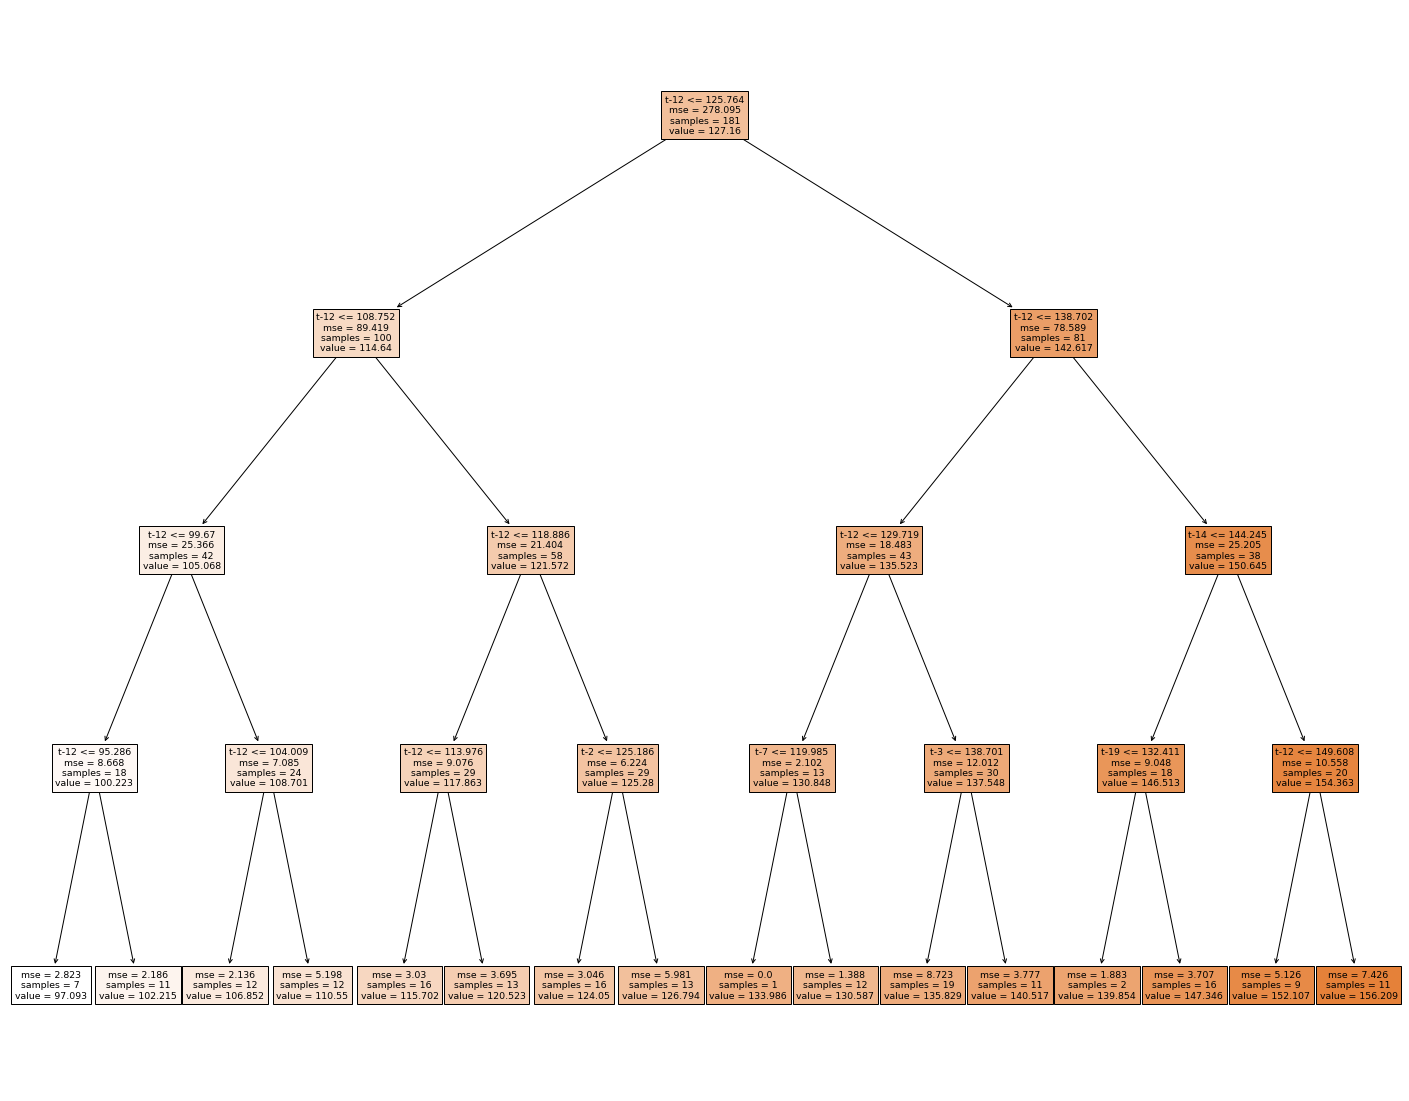

In [ ]:
from sklearn import tree

listacaract=list(df1_final.columns.values)
respuesta=listacaract.pop()
text_representation = tree.export_text(arbol4)
print(text_representation)

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arbol4, 
                   feature_names=listacaract,  
                   class_names=respuesta,
                   filled=True)

In [ ]:
train_prediction = arbol4.predict(train_feature)
test_prediction = arbol4.predict(test_feature)

targetjoint=np.concatenate((train_target,test_target))
predictionjoint=np.concatenate((train_prediction,test_prediction))
print(targetjoint.size)
print(predictionjoint.size)

195
195


In [ ]:
d = {'observado': targetjoint, 'Predicción': predictionjoint}
ObsvsPred=pd.DataFrame(data=d)
ObsvsPred.head(10)

,observado,Predicción
0,97.062825,97.093111
1,101.318814,102.214787
2,97.498290,97.093111
3,102.357796,102.214787
4,99.445437,97.093111
5,94.166809,97.093111
6,99.893779,102.214787
7,98.830801,97.093111
8,102.732360,102.214787
9,97.129383,97.093111


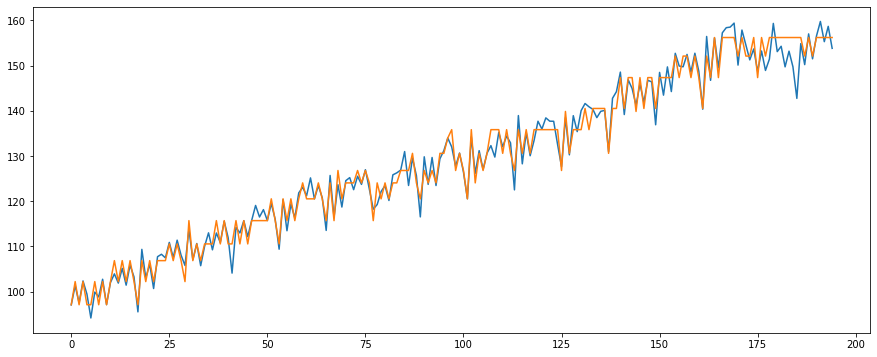

In [ ]:
plt.plot(ObsvsPred)

ERRORES CUADRÁTICOS MEDIOS

Para árboles de decisión:


In [187]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(d["observado"],d['Predicción'])
mse

NameError: ignored

Para suavizamiento exponencial


In [190]:
exp_predicted=exponencial.predict(200,210)
pred_test=logENE[200:211]

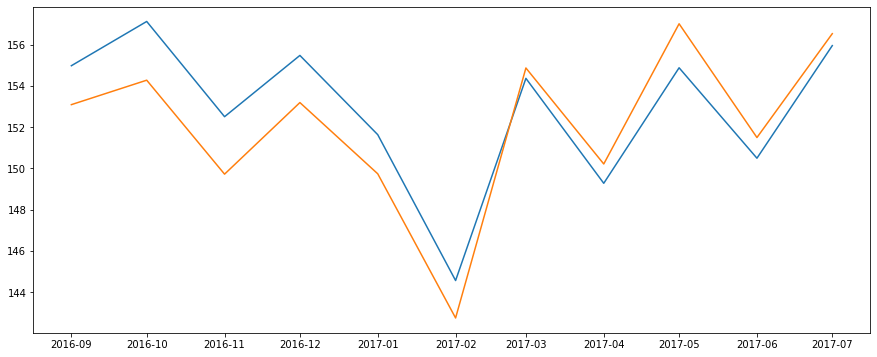

In [191]:
plt.plot(exp_predicted)
plt.plot(pred_test)
plt.show()

In [192]:
from sklearn.metrics import mean_squared_error
mse_exp=mean_squared_error(pred_test,exp_predicted)
print(mse_exp)

3.50717257296376
